## Multiple Linear Regression Model 

## <font color=blue>Prediction of Demand for Shared Bikes

### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

* **Which variables are significant in predicting the demand for shared bikes.**
* **How well those variables describe the bike demands**

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

### Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

In [18]:
# Importing filterwarnings to ignore warning messages
import warnings
warnings.filterwarnings('ignore')

In [19]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
# Reading the bikes rental  dataset into 'bikes' dataframe

bikes=pd.read_csv('day.csv')
bikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [21]:
# looking at the shape of the bikes dataset
bikes.shape

(730, 16)

In [22]:
bikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [23]:
#Finding out the datatype of the columns in the bikes dataset:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.3+ KB


We see there are no missing values in our bikes dataset.

#### In our bikes dataset , we have the following types of columns:
* **Categorical columns: <font color=blue>season , month , weathersit , weekday</font>**
* **Continuous/Numerical columns : <font color=blue>windspeed , hum , temp , atemp , count</font>**
* **Binary/Dichotomous columns:<font color=blue> yr , holiday , workingday</font>**

#### In our bikes dataset,we have some unnecessary columns like:<font color=blue> instant , dteday , casual , registered </font>, so we are going to drop these columns. 

In [24]:
# Dropping the columns : instant,dteday,casual,registered

cols=["instant","dteday","casual","registered"]

bikes=bikes.drop(cols,axis=1)

#### Renaming columns :

In [25]:
# Renaming some columns for more clearity 

bikes.rename(columns={'hum':'humidity','cnt':'count','mnth':'month','yr':'year'},inplace=True)

### Mapping the Categorical columns to their actual category names :

#### 1 . Season column mapping as:<br>
* 1: spring 
* 2: summer 
* 3: fall 
* 4: winter

In [26]:
# Mapping the categorical column : season into its categories

season_cat={1:"spring",2:"summer",3:"fall",4:'winter'}

bikes.season=[season_cat[item] for item in bikes.season]

#### 2 . Weathersit column mapping as:<br>
* 1: clear 
* 2: mist & cloudy 
* 3: light rain & snow 
* 4: heavy rain & snow

In [27]:
# Mapping the categorical column : weathersit into its categories

weather_cat={1:"clear",2:"mist & cloudy",3:"light rain & snow",4:'heavy rain & snow'}

bikes.weathersit=[weather_cat[item] for item in bikes.weathersit]

#### 3 . Month column mapping as:<br>
* 1: Jan , 2: Feb , 3: Mar , 4: Apr , 5: May , 6: Jun , 7: Jul , 8: Aug , 9: Sep , 10: Oct , 11: Nov , 12: Dec

In [28]:
# Mapping the categorical column : month into its categories

month_cat={1: 'Jan' , 2: 'Feb' , 3: 'Mar' , 4: 'Apr' , 5: 'May' , 6: 'Jun' , 7: 'Jul' , 8: 'Aug' , 9: 'Sep' , 10: 'Oct' , 11: 'Nov' , 12: 'Dec'}

bikes.month=[month_cat[item] for item in bikes.month]

#### 4.Weekday column mapping as:
* 0: Sunday
* 1: Monday 
* 2: Tuesday 
* 3: Wednesday
* 4: Thursday
* 5: Friday
* 6: Saturday

In [29]:
# Mapping the categorical column : weekday into its categories

wkday_cat={0: 'Sunday',1: 'Monday',2: 'Tuesday',3: 'Wednesday',4: 'Thursday',5: 'Friday',6: 'Saturday'}

bikes.weekday=[wkday_cat[item] for item in bikes.weekday]

#### 5.Year column mapping as:
* 0: 2018
* 1: 2019 

In [30]:
# Mapping the categorical column : Year into its categories

yr_cat={0: '2018',1: '2019'}

bikes.year=[yr_cat[item] for item in bikes.year]

## Exploratory Data Analysis :

### Analysis of various variables w.r.t  'count' ie., target variable through Visualization:

#### 1. Season :

In [31]:
# Analysing the demand in various seasons
sns.barplot(x='season',y='count',data=bikes)

#### Observation: Bikes rented are more during the Fall season.

#### 2. Year :
* 0: 2018
* 1: 2019

In [32]:
# Analysing the demand in year 2018 and 2019
sns.set_style('whitegrid')
plt.figure(figsize=(6,4))
sns.barplot(x='year',y='count',data=bikes)

#### Observation: Bikes rented are more in the year 2019 as compared to 2018.

#### 3. Month :

In [33]:
# Analysing the demand in various months
sns.set_style('whitegrid')
plt.figure(figsize=(12,6))
sns.barplot(x='month',y='count',data=bikes,hue='year',palette='ocean')

#### Observation: Bikes rented are more in the month of Sep 2019.

#### 4. Weather :

In [34]:
# Analysing the demand in various weathers
sns.set_style('whitegrid')
plt.figure(figsize=(9,4))
sns.barplot(x='weathersit',y='count',data=bikes)

#### Observation: Bikes rented are more in the Clear weather .

#### 5. Weekday :

In [35]:
# Analysing the demand in various weekdays
sns.set_style('whitegrid')
plt.figure(figsize=(9,4))
sns.barplot(x='weekday',y='count',data=bikes)

#### Observation: Bikes rented are more on Saturday and Friday .

#### 6. Working day :  
* 0 : holiday or weekend
* 1 : neither holiday nor weekend ie., working day

In [36]:
# Analysing the demand based on workingday or not a workingday
sns.set_style('whitegrid')
# plt.figure(figsize=(9,4))
sns.barplot(x='workingday',y='count',data=bikes)

#### Observation: Bikes rented are more on working days .

### 7. Visualizing the continuous variables 'temp','atemp','humidity','windspeed' w.r.t 'count ' variable through a pairplot.

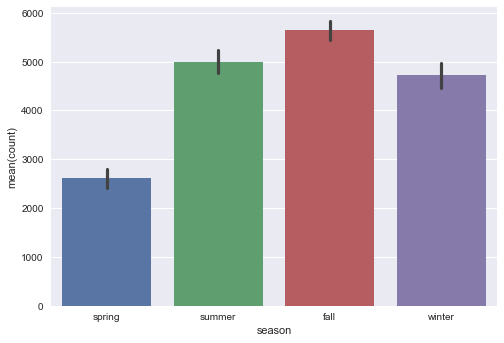

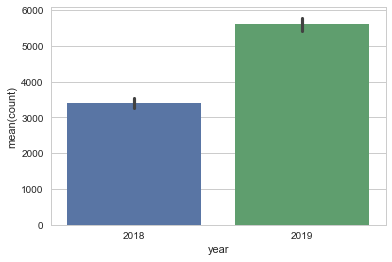

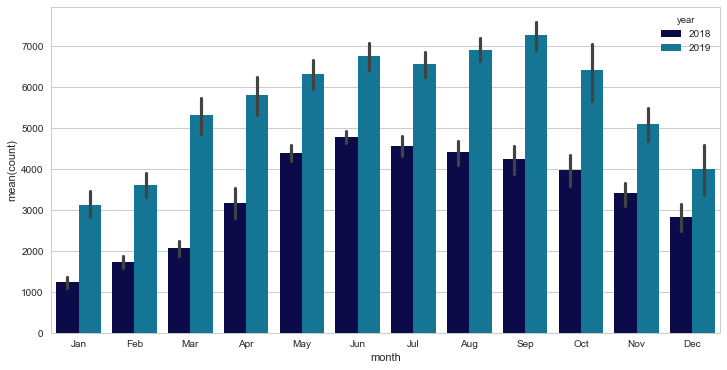

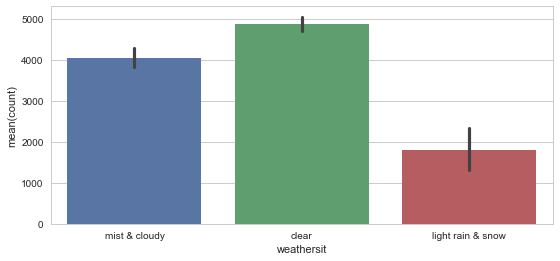

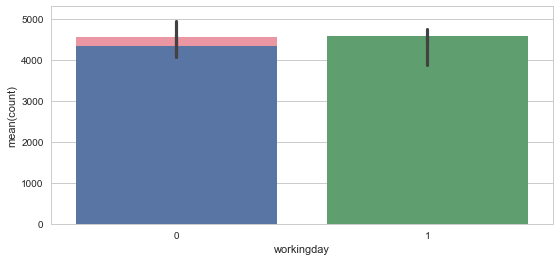

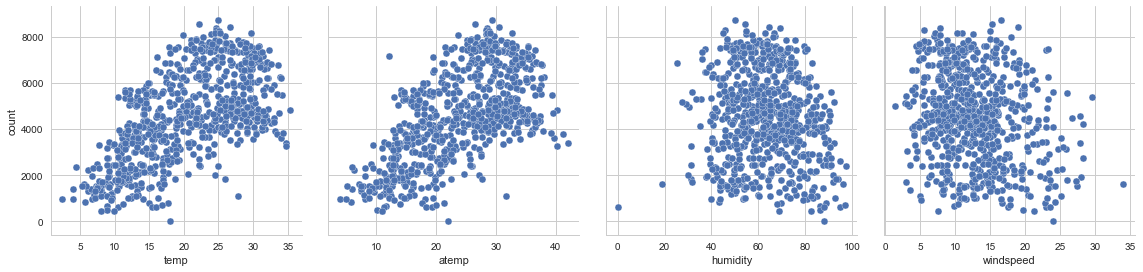

In [37]:
sns.pairplot(bikes, x_vars=['temp','atemp','humidity','windspeed'], y_vars='count',size=4, aspect=1 )
plt.show()

#### Observation: 
* **Bike rental counts show a `positive correlation` with `temp` and `atemp`** and therefore **bike rental counts increase at higher temperatures and vice-versa**

* **Bike rental counts show a `negative correlation` with `humidity`** and therefore **bike rental counts are less at high humidity levels and vice-versa** 

* **Bike rental counts show a `negative correlation` with `windspeed`** and therefore **bike rental counts are less at high windspeed and vice-versa .**


### Checking the Correlations among variables:

In [38]:
plt.figure(figsize=(11,7.5))
sns.heatmap(bikes.corr(),annot=True,cmap='YlGnBu')

#### Observation : It is seen that the variables 'temp' and 'atemp'  have a high correlation value of 0.99 , ie., they are highly correlated to each other , therefore we need to drop one of them . 

In [39]:
# Dropping the variable 'atemp' 
bikes=bikes.drop("atemp",axis=1)

## DATA PREPARATION :

### Creating Dummy Variables for the Categorical variables :
<font color=blue>month , season , weathersit , weekday</font>

In [40]:
# Creating the dummy variables for the variables month,season,weathersit,weekday and storing them 
# in new variable 'months',seasons','weather' and 'weekdays' respectively and 
# dropping the first column from these variables using 'drop_first = True'

months= pd.get_dummies(bikes['month'],drop_first=True,prefix='month')

seasons = pd.get_dummies(bikes['season'],drop_first=True,prefix='season')

weather= pd.get_dummies(bikes['weathersit'],drop_first=True,prefix='weather')

weekdays= pd.get_dummies(bikes['weekday'],drop_first=True,prefix='day')

years= pd.get_dummies(bikes['year'],drop_first=True,prefix='year')

In [41]:
# Add the above created dummy variables to the original bikes dataframe
bikes = pd.concat([bikes,months,seasons,weather,weekdays,years], axis = 1)

# Looking at the top rows of our dataframe.
bikes.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,humidity,windspeed,...,season_winter,weather_light rain & snow,weather_mist & cloudy,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,year_2019
0,spring,2018,Jan,0,Saturday,0,mist & cloudy,14.110847,80.5833,10.749882,...,0,0,1,0,1,0,0,0,0,0
1,spring,2018,Jan,0,Sunday,0,mist & cloudy,14.902598,69.6087,16.652113,...,0,0,1,0,0,1,0,0,0,0
2,spring,2018,Jan,0,Monday,1,clear,8.050924,43.7273,16.636703,...,0,0,0,1,0,0,0,0,0,0
3,spring,2018,Jan,0,Tuesday,1,clear,8.200000,59.0435,10.739832,...,0,0,0,0,0,0,0,1,0,0
4,spring,2018,Jan,0,Wednesday,1,clear,9.305237,43.6957,12.522300,...,0,0,0,0,0,0,0,0,1,0


In [42]:
# As we have created dummy variables for the categorical variables , now we will drop those categorical variables .

bikes.drop(['season','weathersit','weekday','month','year'],axis=1,inplace=True)

In [43]:
# Looking at the shape of dataframe after dropping the above variables
bikes.shape

(730, 29)

### Splitting the Data into Training and Testing Sets

In [44]:
from sklearn.model_selection import train_test_split

bikes_train, bikes_test = train_test_split(bikes, train_size = 0.7, test_size = 0.3, random_state = 100)

In [45]:
#Looking at the shape of the train dataset.
bikes_train.shape

(510, 29)

In [46]:
#Looking at the shape of the test dataset.
bikes_test.shape

(219, 29)

### Scaling the Features 

For Scaling the features in our bikes dataset , we will use `MinMax scaling`.

In [47]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [48]:
# Applying Scaling on the continuous columns : 'windspeed' , 'temp' , 'humidity' , 'count'
vars = ['windspeed' , 'temp' , 'humidity','count']

bikes_train[vars] = scaler.fit_transform(bikes_train[vars])

bikes_train.head()

,holiday,workingday,temp,humidity,windspeed,count,month_Aug,month_Dec,month_Feb,month_Jan,...,season_winter,weather_light rain & snow,weather_mist & cloudy,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,year_2019
653,0,1,0.509887,0.575354,0.300794,0.864243,0,0,0,0,...,1,0,0,0,0,0,0,1,0,1
576,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
426,0,0,0.442393,0.640189,0.255342,0.465255,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1
728,0,0,0.245101,0.498067,0.663106,0.204096,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
482,0,0,0.395666,0.504508,0.188475,0.482973,0,0,0,0,...,0,0,1,0,1,0,0,0,0,1


### Dividing into X and Y sets for the model building :

In [49]:
y_train = bikes_train.pop('count')
X_train = bikes_train

## Data Modelling and Evaluation

#### We will be using the `Mixed Approach` for model building ie., firstly we will select 15 variables by using the `Automated Approach of RFE` and then using `Manual Approach for removing variables one by one based on the Pvalues and VIF values.` 

We will be using the **LinearRegression function from SciKit Learn** for its compatibility with RFE (Recursive Feature Elimination which is a utility from sklearn)

### RFE
`Recursive feature elimination`

In [50]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [51]:
# Running RFE with selecting 15 variables 
lm = LinearRegression()
lm.fit(X_train, y_train)

np.random.seed(0)
rfe = RFE(lm, 15)             # running RFE,15 is the number of variables we want RFE to select
rfe = rfe.fit(X_train, y_train)

In [52]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))  

# rfe_support_ : tells whether RFE selected the variable or not
# rfe.ranking_ : tells the next best variable to be selected and ranks accordingly , The numbers 
#                 beside the variables indicate the importance of that variable.

[('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('month_Aug', False, 9),
 ('month_Dec', False, 4),
 ('month_Feb', False, 5),
 ('month_Jan', False, 2),
 ('month_Jul', True, 1),
 ('month_Jun', False, 12),
 ('month_Mar', False, 14),
 ('month_May', False, 6),
 ('month_Nov', False, 3),
 ('month_Oct', False, 10),
 ('month_Sep', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('weather_light rain & snow', True, 1),
 ('weather_mist & cloudy', True, 1),
 ('day_Monday', False, 7),
 ('day_Saturday', True, 1),
 ('day_Sunday', True, 1),
 ('day_Thursday', False, 11),
 ('day_Tuesday', False, 8),
 ('day_Wednesday', False, 13),
 ('year_2019', True, 1)]

In [53]:
# Looking at the cols that RFE selected
col = X_train.columns[rfe.support_]
col

Index(['holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'month_Jul',
       'month_Sep', 'season_spring', 'season_summer', 'season_winter',
       'weather_light rain & snow', 'weather_mist & cloudy', 'day_Saturday',
       'day_Sunday', 'year_2019'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [54]:
# Creating X_train_rfe dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [55]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [56]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit()   

### Model - 1

In [57]:
#Looking at the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Sun, 07 Mar 2021   Prob (F-statistic):          1.13e-191
Time:                        16:37:45   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.1989      0.028      7.181      0.000       0.144       0.253
holiday                      -0.0190      0.021     -0.892      0.373      -0.061       0.023
workingday                    0.0837      0.010      8.672      0.000       0.065       0.103
temp                          0.5278      0.033     15.897      0.000       0.463       0.593
humidity                     -0.1595      0.037     -4.268      0.000      -0.233      -0.086
windspeed                    -0.1806      0.025     -7.110      0.000      -0.231      -0.131
month_Jul                    -0.0549      0.018     -3.035      0.003      -0.090      -0.019
month_Sep                     0.0818      0.016      4.956      0.000       0.049       0.114
season_spring                -0.0554      0.021     -2.694      0.007      -0.096      -0.015
season_summer                 0.0526      0.015      3.553      0.000       0.024       0.082
season_winter                 0.1003      0.017      5.890      0.000       0.067       0.134
weather_light rain & snow    -0.2463      0.026     -9.449      0.000      -0.298      -0.195
weather_mist & cloudy        -0.0578      0.010     -5.559      0.000      -0.078      -0.037
day_Saturday                  0.0937      0.012      8.045      0.000       0.071       0.117
day_Sunday                    0.0405      0.012      3.304      0.001       0.016       0.065
year_2019                     0.2297      0.008     28.660      0.000       0.214       0.245
==============================================================================
Omnibus:                       64.879   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.454
Skew:                          -0.661   Prob(JB):                     3.91e-35
Kurtosis:                       5.390   Cond. No.                     1.18e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.08e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In the above model , according to the pvalues , all the variables are significant. Now we will have a look at the VIF of the variables to find if any multicollinearity exists betweeen any variable.

**VIF (Variable Inflation Factor) Calculation**

In [58]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,holiday,inf
2,workingday,inf
13,day_Saturday,inf
14,day_Sunday,inf
8,season_spring,5.020000
3,temp,3.620000
10,season_winter,3.490000
9,season_summer,2.610000
4,humidity,1.910000
12,weather_mist & cloudy,1.570000


We see that the VIF value for the 'const' is very high , so we will drop the const.

In [59]:
# Dropping the const variable
X_train_new = X_train_rfe.drop(["const"], axis = 1)

Rebuilding the model without const

Model 2

In [60]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

##Looking at the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Sun, 07 Mar 2021   Prob (F-statistic):          1.13e-191
Time:                        16:37:45   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.1989      0.028      7.181      0.000       0.144       0.253
holiday                      -0.0190      0.021     -0.892      0.373      -0.061       0.023
workingday                    0.0837      0.010      8.672      0.000       0.065       0.103
temp                          0.5278      0.033     15.897      0.000       0.463       0.593
humidity                     -0.1595      0.037     -4.268      0.000      -0.233      -0.086
windspeed                    -0.1806      0.025     -7.110      0.000      -0.231      -0.131
month_Jul                    -0.0549      0.018     -3.035      0.003      -0.090      -0.019
month_Sep                     0.0818      0.016      4.956      0.000       0.049       0.114
season_spring                -0.0554      0.021     -2.694      0.007      -0.096      -0.015
season_summer                 0.0526      0.015      3.553      0.000       0.024       0.082
season_winter                 0.1003      0.017      5.890      0.000       0.067       0.134
weather_light rain & snow    -0.2463      0.026     -9.449      0.000      -0.298      -0.195
weather_mist & cloudy        -0.0578      0.010     -5.559      0.000      -0.078      -0.037
day_Saturday                  0.0937      0.012      8.045      0.000       0.071       0.117
day_Sunday                    0.0405      0.012      3.304      0.001       0.016       0.065
year_2019                     0.2297      0.008     28.660      0.000       0.214       0.245
==============================================================================
Omnibus:                       64.879   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.454
Skew:                          -0.661   Prob(JB):                     3.91e-35
Kurtosis:                       5.390   Cond. No.                     1.18e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.08e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In the above model , according to the pvalues , all the variables are significant. Now we will have a look at the VIF of the variables to find if any multicollinearity exists betweeen any variable.

Checking for VIFs again

In [61]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,50.69
12,day_Saturday,12.20
13,day_Sunday,11.79
7,season_spring,5.02
2,temp,3.62
9,season_winter,3.49
0,holiday,2.91
8,season_summer,2.61
3,humidity,1.91
11,weather_mist & cloudy,1.57


We see that the VIF value for the variable 'humidity' is very high so we are going to drop `humidity` variable.

In [62]:
# Dropping the 'humidity' variable
X_train_new = X_train_new.drop(["humidity"], axis = 1)

Rebuilding the model without humidity

Model 3

In [63]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

##Looking at the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Sun, 07 Mar 2021   Prob (F-statistic):          5.73e-189
Time:                        16:37:46   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.1356      0.024      5.698      0.000       0.089       0.182
holiday                      -0.0350      0.021     -1.646      0.100      -0.077       0.007
workingday                    0.0684      0.009      7.503      0.000       0.050       0.086
temp                          0.4920      0.033     15.056      0.000       0.428       0.556
windspeed                    -0.1491      0.025     -6.032      0.000      -0.198      -0.101
month_Jul                    -0.0500      0.018     -2.723      0.007      -0.086      -0.014
month_Sep                     0.0758      0.017      4.532      0.000       0.043       0.109
season_spring                -0.0653      0.021     -3.139      0.002      -0.106      -0.024
season_summer                 0.0465      0.015      3.101      0.002       0.017       0.076
season_winter                 0.0859      0.017      5.058      0.000       0.053       0.119
weather_light rain & snow    -0.2904      0.024    -11.931      0.000      -0.338      -0.243
weather_mist & cloudy        -0.0835      0.009     -9.669      0.000      -0.100      -0.067
day_Saturday                  0.0801      0.011      7.031      0.000       0.058       0.103
day_Sunday                    0.0221      0.012      1.895      0.059      -0.001       0.045
year_2019                     0.2336      0.008     28.839      0.000       0.218       0.250
==============================================================================
Omnibus:                       66.977   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.728
Skew:                          -0.681   Prob(JB):                     2.80e-36
Kurtosis:                       5.419   Cond. No.                     1.29e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.82e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [64]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,35.88
11,day_Saturday,8.96
12,day_Sunday,8.41
6,season_spring,4.96
2,temp,3.38
8,season_winter,3.36
7,season_summer,2.59
0,holiday,2.34
4,month_Jul,1.48
5,month_Sep,1.29


In the above model, the variable 'workingday' is having high vif value , therefore we drop workingday.

In [65]:
# Dropping the 'workingday' variable
X_train_new = X_train_new.drop(["workingday"], axis = 1)

Rebuilding the model without workingday

Model 4

In [66]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

##Looking at the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Sun, 07 Mar 2021   Prob (F-statistic):          5.73e-189
Time:                        16:37:46   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2039      0.029      6.987      0.000       0.147       0.261
holiday                      -0.1034      0.026     -4.008      0.000      -0.154      -0.053
temp                          0.4920      0.033     15.056      0.000       0.428       0.556
windspeed                    -0.1491      0.025     -6.032      0.000      -0.198      -0.101
month_Jul                    -0.0500      0.018     -2.723      0.007      -0.086      -0.014
month_Sep                     0.0758      0.017      4.532      0.000       0.043       0.109
season_spring                -0.0653      0.021     -3.139      0.002      -0.106      -0.024
season_summer                 0.0465      0.015      3.101      0.002       0.017       0.076
season_winter                 0.0859      0.017      5.058      0.000       0.053       0.119
weather_light rain & snow    -0.2904      0.024    -11.931      0.000      -0.338      -0.243
weather_mist & cloudy        -0.0835      0.009     -9.669      0.000      -0.100      -0.067
day_Saturday                  0.0117      0.011      1.037      0.300      -0.011       0.034
day_Sunday                   -0.0463      0.012     -3.947      0.000      -0.069      -0.023
year_2019                     0.2336      0.008     28.839      0.000       0.218       0.250
==============================================================================
Omnibus:                       66.977   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.728
Skew:                          -0.681   Prob(JB):                     2.80e-36
Kurtosis:                       5.419   Cond. No.                         17.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
# Dropping the 'day_Saturday' variable
X_train_new = X_train_new.drop(["day_Saturday"], axis = 1)

Model 5 

In [68]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

##Looking at the summary of our linear model
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     219.8
Date:                Sun, 07 Mar 2021   Prob (F-statistic):          6.45e-190
Time:                        16:37:47   Log-Likelihood:                 508.10
No. Observations:                 510   AIC:                            -990.2
Df Residuals:                     497   BIC:                            -935.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                         0.2063      0.029      7.088      0.000       0.149       0.263
holiday                      -0.1057      0.026     -4.114      0.000      -0.156      -0.055
temp                          0.4912      0.033     15.034      0.000       0.427       0.555
windspeed                    -0.1479      0.025     -5.989      0.000      -0.196      -0.099
month_Jul                    -0.0496      0.018     -2.701      0.007      -0.086      -0.014
month_Sep                     0.0759      0.017      4.536      0.000       0.043       0.109
season_spring                -0.0653      0.021     -3.140      0.002      -0.106      -0.024
season_summer                 0.0464      0.015      3.092      0.002       0.017       0.076
season_winter                 0.0861      0.017      5.070      0.000       0.053       0.119
weather_light rain & snow    -0.2904      0.024    -11.928      0.000      -0.338      -0.243
weather_mist & cloudy        -0.0835      0.009     -9.670      0.000      -0.101      -0.067
day_Sunday                   -0.0485      0.012     -4.207      0.000      -0.071      -0.026
year_2019                     0.2334      0.008     28.819      0.000       0.217       0.249
==============================================================================
Omnibus:                       63.147   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.837
Skew:                          -0.632   Prob(JB):                     1.96e-35
Kurtosis:                       5.434   Cond. No.                         17.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,5.14
2,windspeed,4.60
6,season_summer,2.22
5,season_spring,2.11
11,year_2019,2.07
7,season_winter,1.82
3,month_Jul,1.59
9,weather_mist & cloudy,1.55
4,month_Sep,1.34
10,day_Sunday,1.18


In [70]:
# Dropping the 'month_Jan' variable
X_train_new = X_train_new.drop(["month_Jan"], axis = 1)

ValueError: labels ['month_Jan'] not contained in axis

Model 6

In [ ]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

##Looking at the summary of our linear model
lm.summary()

In [ ]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# Dropping the 'month_Sep' variable
X_train_new = X_train_new.drop(["month_Sep"], axis = 1)

Model 7

In [ ]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

##Looking at the summary of our linear model
lm.summary()

In [ ]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

In [ ]:
# Dropping the 'season_summer' variable
X_train_new = X_train_new.drop(["season_summer"], axis = 1)

Model 8

In [ ]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new)

#Running the linear model
lm = sm.OLS(y_train,X_train_lm).fit()

##Looking at the summary of our linear model
lm.summary()

In [ ]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

#### From the above model ,we see that the Pvalues of all the 9 variables are very low(approx equal to 0) and VIF values are also less than 5 , which is acceptable.

##### We will now see the F-Statistic value .

### F-Statistics

`F-Statistics is used for testing the overall significance of the Model.`

High value for the F-Statistics means the model is more significant and vice-versa.

* `F-statistic: 268.3
* `Prob (F-statistic):  4.56e-185


#### The F-Statistics value of 268.3 (greater than 1) and the Prob(F-statistic) of '~0.000'(very low) states that the overall model is significant.

#### So we can conclude it as our final model with 9 variables .

#### Model 8 is our final model with :
#### * `R-squared for training set` : <font color= blue>       0.828 ( 82.8 %)</font>
#### * `Adj R-squared for training set`: <font color= blue> 0.825 ( 82.5 %)</font>

**R-squared = 82.8 which means that 82.8 % of the variance for the target variable ie., '`count`'  is explained by the predictor variables , and hence we say that it is a good model.**

**From the coefficients that we get for the variables, our `linear regression equation` becomes:**

**Count** =  0.2505 + 0.4693 X *`temp`* - 0.1482 X *`windspeed`* + 0.2335 X *`year_2019`* - 0.0845 X *`month_Jul`*  -              0.1122 X *`season_spring`* + 0.0464 X *`season_winter`* - 0.2810 X *`weather_light rain & snow`* - 0.0794 X            *`weather_mist & cloudy`* - 0.0926 X *`holiday`* 

## Residual Analysis of the training set

Now we will try to check one of the major assumptions of the linear regression ie., checking whether the error terms are normally distributed by plotting a histogram of the error terms and see what it looks like.

In [ ]:
y_train_count = lm.predict(X_train_lm)

In [ ]:
# Plotting the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_count), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                   
plt.xlabel('Errors', fontsize = 18)      

**Since the errors terms are normally distributed with mean=0, thus our assumption is satisfied in our model.**

## Making Predictions

### Applying the scaling on the test set also

In [ ]:
# Applying Scaling on the continuous columns : 'windspeed' , 'temp' , 'humidity'
vars = ['windspeed' , 'temp' , 'humidity','count']

bikes_test[vars] = scaler.transform(bikes_test[vars])

### Dividing into X_test and y_test

In [ ]:
y_test = bikes_test.pop('count')
X_test = bikes_test

In [ ]:
# Using our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [ ]:
# Making predictions
y_pred = lm.predict(X_test_new)

## Model Evaluation

In [ ]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 

The predicted values have a linear relationship with actual values.

### Calculating R-squared value for Test set

In [ ]:
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
r2

### Calculating Adj. R-squared value for Test set

In [ ]:
n = X_test_new.shape[0]      # n is number of rows in X_test_new

p = X_test_new.shape[1]     # p= Number of features/predictors which is number of columns in X_test_new

# Calculating Adjusted R-squared value using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

In [ ]:
# calculating the Mean Squared Error , Root Mean Squared Error and Mean Absolute error
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

### Comparison between the results on Train and Test datasets:

* `R-squared Value`:<br><br>
    * **Train set : <font color=blue>82.8% </font>** 
    * **Test set : <font color=blue>80.5% </font>**
<br><br>

* `Adj R-squared Value`:<br><br>
     * **Train set : <font color=blue>82.5%</font>**
     * **Test set : <font color=blue>79.6%</font>**

* As we can see that the **difference between the R-squared value for the train and test dataset is not more than 5% , therefore we can say that this is a good model** . 

* As we can see that the **difference between the Adj R-squared value for the train and test dataset is not more than 5% , therefore we can say that this is a good model** . 

### Reporting the Final Model:


**From the coefficients that we get for the variables, our `linear regression equation` becomes:**


**Count** =  0.2505 + 0.4693 X *`temp`* - 0.1482 X *`windspeed`* + 0.2335 X *`year_2019`* - 0.0845 X *`month_Jul`*  -              0.1122 X *`season_spring`* + 0.0464 X *`season_winter`* - 0.2810 X *`weather_light rain & snow`* - 0.0794 X            *`weather_mist & cloudy`* - 0.0926 X *`holiday`* 

From the regression model above , we have the following variables and their coefficients which are significant in predicting the demand for shared bikes:

* temp = 0.4693
* windspeed = -0.1482 
* year_2019 = 0.2335
* month_Jul = -0.0845
* season_spring = -0.1122
* season_winter = 0.0464
* weather_light rain or snow = -0.2810 
* weather_mist and cloudy = -0.0794
* holiday = -0.0926

**The three most significant variables affecting the demand for shared bikes are :**
* **temperature** 
* **year**
* **season winter** 

as these features are having positive coefficients and an increase in them is going to result into an increase in the demand for shared bikes .

#### Thanks for Reading !!!

#### Please provide feedback in comments section . 